In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set(color_codes=True)


In [ ]:
import requests
url='https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
response=requests.get(url)

raw_data= response.content.decode("utf-8")
raw_data= raw_data.split("\n")

with open('breast_cancer.csv','w') as file:
    for row in raw_data:
        file.write(row+'\n')

df=pd.read_csv('breast_cancer.csv', header=None)

In [ ]:
#Replaced Column Names 
#REPLACED LABEL 2 WITH 0! Because 2 denoted death and 1 denoted survival after 5 years
#So for proper prediction by mainstream Logistic Regression. REPLACED ALL 2s with 0s

df=df.rename(columns={0:'Age',1:'Year',2:'No. of Nodes',3:"Survival"})
#df.dtypes
df.replace({'Survival':{2:0,},},inplace=True)
df

,Age,Year,No. of Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


#**Basic EDA on the Data**

In [ ]:
df.isnull().sum()

Age             0
Year            0
No. of Nodes    0
Survival        0
dtype: int64

In [ ]:
print('No. of unique values:')
for col in df.columns:
    print(f'{col}: %d'%len(df[col].unique()))

No. of unique values:
Age: 49
Year: 12
No. of Nodes: 31
Survival: 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


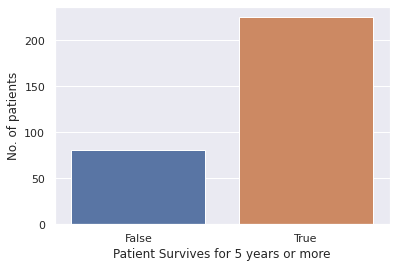

In [ ]:
sns.barplot(df['Survival'].unique().astype(bool),df['Survival'].value_counts())
plt.xlabel('Patient Survives for 5 years or more')
plt.ylabel('No. of patients')
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


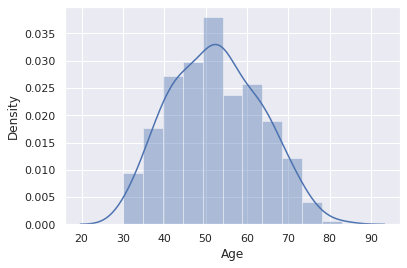

In [ ]:
sns.distplot(df['Age'])
plt.show()

#**Logistic Regression Preparation**

In [ ]:
X=df.drop('Survival',axis=1).to_numpy()
y=df['Survival'].to_numpy().reshape(-1,1)
m,n=X.shape

In [ ]:
def split(X, y, train_ratio=0.8, seed=1):
    m,n=X.shape
    m_train= int(m*train_ratio)
    m_test= m-m_train

    np.random.seed(seed)
    a=np.random.permutation(m)

    X_train= X[a[:m_train]]
    y_train= y[a[:m_train]]
    X_test= X[a[m_train:]]
    y_test= y[a[m_train:]]

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression()

#Centrally controlled Seed for random allotment
seed=1

#**1) Train-Test Split = 80:20**

In [ ]:
X_train, X_test, y_train, y_test= split(X,y,0.8,seed)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(244, 3) (62, 3)
(244, 1) (62, 1)


In [ ]:
logistic_model.fit(X_train, y_train.ravel())
y_train_pred= logistic_model.predict(X_train)

intercept= logistic_model.intercept_
coefficients= logistic_model.coef_

y_test_pred= logistic_model.predict(X_test)

print('1) Intercept is: %s \n'%intercept)
print('2) Coefficients are: %s \n'%coefficients[0])

print('3) Test Set Predictions: ',end='')
print(y_test_pred)

1) Intercept is: [2.90040826] 

2) Coefficients are: [-0.02164722 -0.00667274 -0.08639114] 

3) Test Set Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
m_test= y_test.shape[0]
error= np.sum(y_test!=y_test_pred.reshape(-1,1))/m_test
print('\nClassification Error = %s'%error)


Classification Error = 0.1935483870967742


#**2) Train-Test Split= 60:40**

In [ ]:
X_train, X_test, y_train, y_test= split(X,y,0.6,seed)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(183, 3) (123, 3)
(183, 1) (123, 1)


In [ ]:
logistic_model.fit(X_train, y_train.ravel())
y_train_pred= logistic_model.predict(X_train)

intercept= logistic_model.intercept_
coefficients= logistic_model.coef_

y_test_pred= logistic_model.predict(X_test)

print('1) Intercept is: %s \n'%intercept)
print('2) Coefficients are: %s \n'%coefficients[0])

print('3) Test Set Predictions: ',end='')
print(y_test_pred)

1) Intercept is: [1.73243498] 

2) Coefficients are: [-0.0329159   0.02099039 -0.06388733] 

3) Test Set Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
m_test= y_test.shape[0]
error= np.sum(y_test!=y_test_pred.reshape(-1,1))/m_test

print('Classification Error = %s'%error)

Classification Error = 0.25203252032520324


#**3) Train-Test Split= 70:30**

In [ ]:
X_train, X_test, y_train, y_test= split(X,y,0.7,seed)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(214, 3) (92, 3)
(214, 1) (92, 1)


In [ ]:
logistic_model.fit(X_train, y_train.ravel())
y_train_pred= logistic_model.predict(X_train)

intercept= logistic_model.intercept_
coefficients= logistic_model.coef_

y_test_pred= logistic_model.predict(X_test)

print('1) Intercept is: %s \n'%intercept)
print('2) Coefficients are: %s \n'%coefficients[0])

print('3) Test Set Predictions: ',end='')
print(y_test_pred)

1) Intercept is: [2.32870246] 

2) Coefficients are: [-0.02376401  0.00325063 -0.06662596] 

3) Test Set Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
m_test= y_test.shape[0]
error= np.sum(y_test!=y_test_pred.reshape(-1,1))/m_test

print('Classification Error = %s'%error)

Classification Error = 0.2391304347826087


#**4) Train-Test Split = 90:10**

In [ ]:
X_train, X_test, y_train, y_test= split(X,y,0.9,seed)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(275, 3) (31, 3)
(275, 1) (31, 1)


In [ ]:
logistic_model.fit(X_train, y_train.ravel())
y_train_pred= logistic_model.predict(X_train)

intercept= logistic_model.intercept_
coefficients= logistic_model.coef_

y_test_pred= logistic_model.predict(X_test)

print('1) Intercept is: %s \n'%intercept)
print('2) Coefficients are: %s \n'%coefficients[0])

print('3) Test Set Predictions: ',end='')
print(y_test_pred)

1) Intercept is: [2.76784805] 

2) Coefficients are: [-0.0242774  -0.00120911 -0.09817534] 

3) Test Set Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
m_test= y_test.shape[0]
error= np.sum(y_test!=y_test_pred.reshape(-1,1))/m_test

print('Classification Error = %s'%error)

Classification Error = 0.22580645161290322


#**Logistic Regression from Scratch**
Condition for Function to be classified as 1 or positive is that its sigmoid >= **0.5 (DEFAULT**). You can change this condition as well. By changing the threshold value achieved by the sigmoid-

$\sigma (z)= \frac{1}{1+e^{-z}}$

$y_i =
\left\{
	\begin{array}{ll}
		1  & \mbox{if } \sigma (z) \geq 0.5 \\
		0  & \mbox{if } \sigma (z) < 0.5
	\end{array}
\right.$

Also, I've **used Normalisation in my Logistic Function** to decrease the computing time, hence the intercept and coefficient values might be a bit off. Also, I guess **there is regularisation by default** in the **sklearn Logistic Regression module**, which I've not included in my function.

In [ ]:
def normalize(X):
    m,n=X.shape
    mu= np.mean(X, axis=0)
    std= np.std(X, axis=0)

    X= X-mu
    X=X/std
    X= np.concatenate((np.ones(m).reshape(-1,1), X), axis=1)

    return mu, std, X

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def costFunction(X,y,beta):
    m,n=X.shape
    h=sigmoid(np.dot(X, beta))

    J= -np.sum(y*np.log(h)+(1-y)*np.log(1-h))/m
    grad= np.dot(X.T, h-y)/m

    return J, grad

In [ ]:
def gradientDescent(X,y,beta, alpha, num_iters):
    J_history=[]
    for i in range(num_iters):
        J, grad= costFunction(X,y,beta)
        beta= beta - alpha*grad
        J_history.append(J)
    
    return beta, J_history

In [ ]:
#If sigmoid(X*beta) >0.5 prediction=1 o/s =0
def predict(X,beta, threshold):
    return (sigmoid(np.dot(X,beta))>= threshold).astype(int)

In [ ]:
def logistic_scratch(X, y, train_ratio=0.8, seed=1, alpha=0.1, num_iter=400, threshold=0.5):
    X_train, X_test, y_train, y_test= split(X,y,train_ratio,seed)
    
    mu,std,X1_train= normalize(X_train)
    m_train,n=X1_train.shape
    m_test= X_test.shape[0]
    
    #Logistic Regression begins with Gradient Descent
    beta, J_history= gradientDescent(X1_train,y_train,np.zeros((n,1)),alpha,num_iter)
    
    #Plotting J wrt Number of iterations
    plt.plot(J_history)
    plt.title('Cost Function Trend')
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost Function J")
    plt.show()
    
    #Computing Predictions and Prediction Classification Error
    X1_test= (X_test-mu)/std
    X1_test= np.concatenate((np.ones(m_test).reshape(-1,1), X1_test), axis=1)
    y_test_pred= predict(X1_test,beta, threshold)

    
    print('1) Intercept is: %s \n'%beta[0])
    print('2) Coefficients are: %s \n'%beta[1:])

    print('3) Test Set Predictions: ',end='')
    print(y_test_pred.T[0]) 
    error= np.sum(y_test!=y_test_pred)/m_test
    print('\nClassification Error = %s'%error)

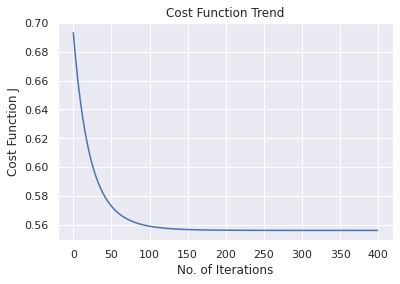

1) Intercept is: [0.97589646] 

2) Coefficients are: [[-0.23203816]
 [-0.02210131]
 [-0.62107572]] 

3) Test Set Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]

Classification Error = 0.1935483870967742


In [ ]:
logistic_scratch(X,y,train_ratio=0.8,seed=1)